<a href="https://colab.research.google.com/github/babupallam/Msc_AI_Module2_Natural_Language_Processing/blob/main/Note_03_Approaches_to_Automatic_Tagging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


- This focuses on the various approaches used for automating **Part-of-Speech (POS) tagging**, a crucial task in Natural Language Processing (NLP).
- This section delves into several tagging techniques, each varying in complexity and accuracy, ranging from simple rule-based models to more advanced statistical and machine learning methods.
- These approaches form the foundation for accurate syntactic analysis and provide the groundwork for more complex NLP tasks like parsing, named entity recognition, and machine translation.



### **1. Default Tagger**

- The **default tagger** is the simplest form of POS tagging.
- It assigns the same part of speech to every word in a corpus, typically using the most frequent tag, which is often **noun** (since nouns are common in many texts).



#### How It Works:
- Every word in the corpus is tagged with a single, predefined POS tag (e.g., **NN** for nouns).
- This is useful as a baseline model to compare with more sophisticated tagging methods.



#### Limitations:
- While easy to implement, it is not very accurate because it ignores the specific word or its context.
- Example: In a sentence like "She runs every day," every word would be tagged as a noun, leading to incorrect tags for words like "runs" (which should be a verb).



#### Use Case:
- The default tagger is mostly used as a **backoff strategy** in combination with other, more advanced taggers.



#### Demonstration

In [8]:
import nltk
from nltk import DefaultTagger
from nltk.corpus import brown

# Example sentences
sentences = ["The quick brown fox jumps over the lazy dog.",
             "A beautiful morning in the city."]

# Tokenize the sentences
tokens = [nltk.word_tokenize(sentence) for sentence in sentences]

# Create a DefaultTagger that tags every word as a noun (NN)
default_tagger = DefaultTagger('NN')

# Apply the tagger to each sentence
for sentence_tokens in tokens:
    tagged = default_tagger.tag(sentence_tokens)
    print("Tagged Sentence (Default Tagger):", tagged)

# Evaluate accuracy on the Brown corpus (just for demonstration)
brown_tagged_sents = brown.tagged_sents(categories='news')
accuracy = default_tagger.evaluate(brown_tagged_sents)
print("Accuracy of Default Tagger on Brown corpus:", accuracy)


Tagged Sentence (Default Tagger): [('The', 'NN'), ('quick', 'NN'), ('brown', 'NN'), ('fox', 'NN'), ('jumps', 'NN'), ('over', 'NN'), ('the', 'NN'), ('lazy', 'NN'), ('dog', 'NN'), ('.', 'NN')]
Tagged Sentence (Default Tagger): [('A', 'NN'), ('beautiful', 'NN'), ('morning', 'NN'), ('in', 'NN'), ('the', 'NN'), ('city', 'NN'), ('.', 'NN')]


<ipython-input-8-3be1c739854f>:22: DeprecationWarning: 
  Function evaluate() has been deprecated.  Use accuracy(gold)
  instead.
  accuracy = default_tagger.evaluate(brown_tagged_sents)


Accuracy of Default Tagger on Brown corpus: 0.13089484257215028


### **2. Regular Expression Tagger**

The **regular expression (regex) tagger** is slightly more advanced than the default tagger. It uses regular expressions to identify patterns in words and tag them based on these patterns. For example, it can tag words ending in "ed" as past-tense verbs.



#### How It Works:
- Patterns are created using regular expressions that match certain word characteristics, such as suffixes, prefixes, or capitalization.
- The regex tagger then assigns a part of speech to any word that fits these patterns.



#### Example:
- Words ending in "ing" can be tagged as **VBG** (gerund or present participle).
- Example sentence: "The dog is barking."
  - "barking" would be tagged as a **VBG**.



#### Limitations:
- While useful for tagging simple patterns, it struggles with words that don’t follow standard morphological rules.
- Regex taggers are **rule-based**, and the rules must be manually created, making it less scalable for large datasets or complex text structures.



#### Demonstration

In [9]:
from nltk import RegexpTagger

# Define additional regular expression patterns
patterns = [
    (r'.*ing$', 'VBG'),    # Gerunds (e.g., 'running')
    (r'.*ed$', 'VBD'),     # Past tense verbs (e.g., 'talked')
    (r'.*es$', 'VBZ'),     # 3rd person singular present (e.g., 'talks')
    (r'.*ould$', 'MD'),    # Modal verbs (e.g., 'could', 'should')
    (r'[0-9]+', 'CD'),     # Numbers
    (r'^The$', 'DT'),      # Specific words (e.g., 'The')
    (r'.*ly$', 'RB'),      # Adverbs (e.g., 'quickly')
    (r'.*', 'NN')          # Default: nouns
]

# Create a RegexpTagger
regexp_tagger = RegexpTagger(patterns)

# Example sentences with diverse structures
sentences = ["She is running quickly to the park.",
             "The cat jumped over the fence.",
             "Could you help me please?"]

# Tokenize and apply the regex tagger to each sentence
for sentence in sentences:
    tokens = nltk.word_tokenize(sentence)
    tagged = regexp_tagger.tag(tokens)
    print("Tagged Sentence (Regex Tagger):", tagged)

# Evaluate the tagger on the Brown corpus
brown_tagged_sents = brown.tagged_sents(categories='news')
accuracy = regexp_tagger.evaluate(brown_tagged_sents)
print("Accuracy of Regex Tagger on Brown corpus:", accuracy)


Tagged Sentence (Regex Tagger): [('She', 'NN'), ('is', 'NN'), ('running', 'VBG'), ('quickly', 'RB'), ('to', 'NN'), ('the', 'NN'), ('park', 'NN'), ('.', 'NN')]
Tagged Sentence (Regex Tagger): [('The', 'DT'), ('cat', 'NN'), ('jumped', 'VBD'), ('over', 'NN'), ('the', 'NN'), ('fence', 'NN'), ('.', 'NN')]
Tagged Sentence (Regex Tagger): [('Could', 'MD'), ('you', 'NN'), ('help', 'NN'), ('me', 'NN'), ('please', 'NN'), ('?', 'NN')]


<ipython-input-9-d0ff9955ecfd>:31: DeprecationWarning: 
  Function evaluate() has been deprecated.  Use accuracy(gold)
  instead.
  accuracy = regexp_tagger.evaluate(brown_tagged_sents)


Accuracy of Regex Tagger on Brown corpus: 0.17838176502177935


### **3. Unigram Tagger**

A **unigram tagger** assigns the most frequent POS tag to a word based on its appearance in a training corpus. The unigram tagger is a **statistical model** that uses frequency counts to make tagging decisions.



#### How It Works:
- The unigram tagger learns the most likely tag for each word from a labeled training corpus. For instance, if the word "bank" appears more often as a noun than as a verb in the training data, it will always be tagged as a noun.
  


#### Advantages:
- It is more accurate than the default or regex tagger because it uses the actual words in the corpus for tagging decisions.
- The unigram tagger is also fast to implement and easy to train on large datasets.



#### Limitations:
- The unigram tagger does not take context into account. If a word has multiple meanings (e.g., "bank" as both a noun and a verb), it will always be tagged with its most frequent usage, regardless of the sentence context.
  


#### Example:
- In the sentence "The bank will open soon," the word "bank" could be tagged as **NN** (noun).
- In the sentence "He will bank the fire," "bank" should be a verb, but the unigram tagger may tag it as a noun if that is the most frequent tag in the training data.



#### Demonstration

In [19]:
from nltk.corpus import brown
from nltk import UnigramTagger
from nltk import DefaultTagger


#============== just to remove warning message
import warnings  # Import warnings module

# Ignore deprecation and resource warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=ResourceWarning)

#=================

# Training and testing data from Brown corpus
brown_tagged_sents = brown.tagged_sents(categories='news')
train_data = brown_tagged_sents[:4000]  # Training on the first 4000 sentences
test_data = brown_tagged_sents[4000:]   # Testing on the rest

# Create a DefaultTagger as backoff to handle unseen words
default_tagger = DefaultTagger('NN')

# Train a UnigramTagger with backoff
unigram_tagger = UnigramTagger(train_data, backoff=default_tagger)

# Example sentence
sentence = "The city of London is beautiful."
tokens = nltk.word_tokenize(sentence)

# Tagging the sentence
tagged = unigram_tagger.tag(tokens)
print("Tagged Sentence (Unigram Tagger with Backoff):", tagged)

# Evaluate the tagger on the test set
accuracy = unigram_tagger.evaluate(test_data)
print("Accuracy of Unigram Tagger on Brown corpus:", accuracy)


Tagged Sentence (Unigram Tagger with Backoff): [('The', 'AT'), ('city', 'NN'), ('of', 'IN'), ('London', 'NP'), ('is', 'BEZ'), ('beautiful', 'JJ'), ('.', '.')]
Accuracy of Unigram Tagger on Brown corpus: 0.8344073130526001


### **4. Lookup Tagger**

The **lookup tagger** is a simple dictionary-based tagging method. It assigns tags by consulting a predefined mapping of words to tags, similar to how one would look up the part of speech in a dictionary.



#### How It Works:
- A lookup table is created from a tagged corpus, where each word is assigned the most frequent tag it has received in the training data.
- For unknown words (words not found in the dictionary), the tagger defaults to a tag like "NN" (noun).



#### Advantages:
- **Efficiency**: It is very fast because it only needs to look up words in a precompiled dictionary.
- **Simplicity**: Easy to implement and use with limited resources.



#### Limitations:
- **Lack of Context**: Like the unigram tagger, it does not consider surrounding words, so it cannot handle ambiguous words (e.g., "run" as a verb vs. noun) based on context.
  


#### Example:
- The word "dog" would always be tagged as **NN** (noun), even if used in a phrase where it should be an adjective.


#### Demonstration

In [24]:
import nltk
from nltk.corpus import brown
from nltk import DefaultTagger
from collections import defaultdict

#============== just to remove warning message
import warnings  # Import warnings module

# Ignore deprecation and resource warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=ResourceWarning)

#=================

# Training and testing data from Brown corpus
brown_tagged_sents = brown.tagged_sents(categories='news')
train_data = brown_tagged_sents[:4000]  # Training on the first 4000 sentences
test_data = brown_tagged_sents[4000:]   # Testing on the rest

# Building a lookup dictionary based on training data
lookup_dict = defaultdict(lambda: 'NN')  # Default tag is 'NN'
for sent in train_data:
    for word, tag in sent:
        if word not in lookup_dict:
            lookup_dict[word] = tag  # Assign the most frequent tag

# Creating a custom Lookup Tagger based on the dictionary
class LookupTagger:
    def __init__(self, lookup_dict):
        self.lookup_dict = lookup_dict

    def tag(self, tokens):
        return [(word, self.lookup_dict.get(word, 'NN')) for word in tokens]

# Example sentence
sentence = "The city of London is beautiful."
tokens = nltk.word_tokenize(sentence)

# Tagging the sentence using LookupTagger
lookup_tagger = LookupTagger(lookup_dict)
tagged = lookup_tagger.tag(tokens)
print("Tagged Sentence (Lookup Tagger):", tagged)


Tagged Sentence (Lookup Tagger): [('The', 'AT'), ('city', 'NN'), ('of', 'IN'), ('London', 'NP'), ('is', 'BEZ'), ('beautiful', 'JJ'), ('.', '.')]


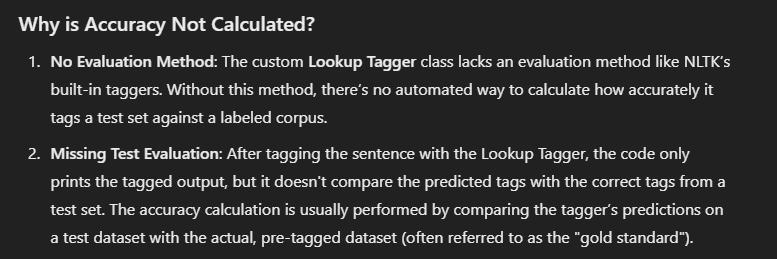

Solution: Create custom evaluate function and find accuracy

In [27]:
import nltk
from nltk.corpus import brown
from nltk import DefaultTagger
from collections import defaultdict

#============== just to remove warning message
import warnings  # Import warnings module

# Ignore deprecation and resource warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=ResourceWarning)

#=================

# Training and testing data from Brown corpus
brown_tagged_sents = brown.tagged_sents(categories='news')
train_data = brown_tagged_sents[:4000]  # Training on the first 4000 sentences
test_data = brown_tagged_sents[4000:]   # Testing on the rest

# Building a lookup dictionary based on training data
lookup_dict = defaultdict(lambda: 'NN')  # Default tag is 'NN'
for sent in train_data:
    for word, tag in sent:
        if word not in lookup_dict:
            lookup_dict[word] = tag  # Assign the most frequent tag

# Creating a custom Lookup Tagger based on the dictionary
class LookupTagger:
    def __init__(self, lookup_dict):
        self.lookup_dict = lookup_dict

    def tag(self, tokens):
        return [(word, self.lookup_dict.get(word, 'NN')) for word in tokens]

    def evaluate(self, test_data):
        correct = 0
        total = 0
        for sent in test_data:
            words = [word for word, _ in sent]
            gold_tags = [tag for _, tag in sent]
            predicted_tags = [tag for _, tag in self.tag(words)]
            correct += sum(1 for gold, predicted in zip(gold_tags, predicted_tags) if gold == predicted)
            total += len(gold_tags)
        return correct / total

# Example sentence
sentence = "The city of London is beautiful."
tokens = nltk.word_tokenize(sentence)

# Tagging the sentence using LookupTagger
lookup_tagger = LookupTagger(lookup_dict)
tagged = lookup_tagger.tag(tokens)
print("Tagged Sentence (Lookup Tagger):", tagged)

# Evaluate the Lookup Tagger on the test set
accuracy = lookup_tagger.evaluate(test_data)
print("Accuracy of Lookup Tagger on Brown corpus:", accuracy)


Tagged Sentence (Lookup Tagger): [('The', 'AT'), ('city', 'NN'), ('of', 'IN'), ('London', 'NP'), ('is', 'BEZ'), ('beautiful', 'JJ'), ('.', '.')]
Accuracy of Lookup Tagger on Brown corpus: 0.8230930615914881



### **5. N-Gram Taggers (Bigram Tagger)**

The **bigram tagger** improves accuracy by considering not just the current word but also the tag of the preceding word when assigning a part of speech. This is the simplest form of **contextual taggers**, and it accounts for **bigram** relationships between words and their tags.



#### How It Works:
- The bigram tagger looks at the current word and the POS tag of the previous word to decide the correct tag.
  


#### Example:
- In the sentence "She can fish," the word "can" could be ambiguous. If the previous word is "She," a **bigram tagger** would recognize that "can" is more likely to be a modal auxiliary (**MD**) than a verb.



#### Advantages:
- It provides greater accuracy for tagging sequences of words than unigram or lookup taggers.
  


#### Limitations:
- **Data Sparsity**: Bigram taggers can run into issues with rare or unseen word pairs in smaller corpora, leading to misclassification.


#### Demonstration

In [25]:
import nltk
from nltk.corpus import brown
from nltk import BigramTagger, DefaultTagger, UnigramTagger

#============== just to remove warning message
import warnings  # Import warnings module

# Ignore deprecation and resource warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=ResourceWarning)

#=================

# Training and testing data from Brown corpus
brown_tagged_sents = brown.tagged_sents(categories='news')
train_data = brown_tagged_sents[:4000]  # Training on the first 4000 sentences
test_data = brown_tagged_sents[4000:]   # Testing on the rest

# Create a DefaultTagger as backoff to handle unseen words
default_tagger = DefaultTagger('NN')

# Create a UnigramTagger with backoff to handle unseen bigram contexts
unigram_tagger = UnigramTagger(train_data, backoff=default_tagger)

# Train a BigramTagger with backoff
bigram_tagger = BigramTagger(train_data, backoff=unigram_tagger)

# Example sentence
sentence = "The city of London is beautiful."
tokens = nltk.word_tokenize(sentence)

# Tagging the sentence using Bigram Tagger
tagged = bigram_tagger.tag(tokens)
print("Tagged Sentence (Bigram Tagger with Backoff):", tagged)

# Evaluate the Bigram Tagger on the test set
accuracy = bigram_tagger.evaluate(test_data)
print("Accuracy of Bigram Tagger on Brown corpus:", accuracy)


Tagged Sentence (Bigram Tagger with Backoff): [('The', 'AT'), ('city', 'NN'), ('of', 'IN'), ('London', 'NP'), ('is', 'BEZ'), ('beautiful', 'JJ'), ('.', '.')]
Accuracy of Bigram Tagger on Brown corpus: 0.8427244118087817


### **6. N-Gram Taggers (Trigram)**

**N-gram taggers** consider the tags of surrounding words (context) to make better tagging decisions. In particular, **bigram** and **trigram** taggers use the previous one or two tags, respectively, to predict the tag for the current word.



#### How It Works:
- **Bigram taggers** look at the current word and the tag of the previous word to predict the POS tag.
- **Trigram taggers** look at the current word and the tags of the two preceding words.
  
This approach introduces contextual information, which can greatly improve accuracy over the unigram tagger.



#### Example:
- In the sentence "I can fish," the word "can" might be ambiguous (it can be a verb or a modal auxiliary). If the previous word was "I" (a pronoun), the tagger would more likely tag "can" as a modal auxiliary (**MD**), rather than a verb.



#### Advantages:
- By using context, N-gram taggers can resolve some ambiguities that unigram taggers cannot.
  


#### Limitations:
- **Data Sparsity**: As the N value increases (bigram, trigram), the model becomes more reliant on large amounts of training data. For rare combinations of words and tags, the model may not perform well.
- **Overfitting**: N-gram taggers may overfit to the training data, especially when there are unique or rare tag sequences.



#### Demonstration

In [23]:
from nltk import BigramTagger, TrigramTagger

#============== just to remove warning message
import warnings  # Import warnings module

# Ignore deprecation and resource warnings
warnings.filterwarnings("ignore", category=ResourceWarning)

#=================


# Train Bigram and Trigram Taggers with backoff strategy
bigram_tagger = BigramTagger(train_data, backoff=unigram_tagger)
trigram_tagger = TrigramTagger(train_data, backoff=bigram_tagger)

# Example sentence
sentence = "The quick brown fox jumps over the lazy dog."
tokens = nltk.word_tokenize(sentence)

# Apply Trigram Tagger with backoff
tagged = trigram_tagger.tag(tokens)
print("Tagged Sentence (Trigram Tagger with Backoff):", tagged)

# Evaluate Trigram Tagger on the test set
accuracy = trigram_tagger.evaluate(test_data)
print("Accuracy of Trigram Tagger on Brown corpus:", accuracy)


Tagged Sentence (Trigram Tagger with Backoff): [('The', 'AT'), ('quick', 'JJ'), ('brown', 'NN'), ('fox', 'NN'), ('jumps', 'NN'), ('over', 'IN'), ('the', 'AT'), ('lazy', 'NN'), ('dog', 'NN'), ('.', '.')]
Accuracy of Trigram Tagger on Brown corpus: 0.8413007642739397


### **7. Backoff Tagging**

A **backoff tagger** is a method of combining multiple tagging strategies to improve accuracy. When one tagger (usually a more complex one like a trigram tagger) fails to tag a word, it backs off to a simpler tagger (like a bigram tagger), and so on, eventually backing off to a default tagger if no other taggers succeed.



#### How It Works:
- First, the model attempts to tag using the most sophisticated tagger (e.g., trigram tagger).
- If the trigram tagger cannot make a decision, the model "backs off" to the bigram tagger.
- If the bigram tagger fails, the model backs off to a unigram tagger.
- Finally, if none of the models can tag a word, the default tagger is used as a last resort.



#### Example:
- Sentence: "The dog barked loudly."
  - The trigram tagger might assign tags for "The dog barked" based on context, but for "loudly," it could fail to find a suitable tag if the word hasn't been seen in that context. The bigram or unigram tagger can then back off and assign the appropriate tag (**RB** for adverb).



#### Advantages:
- Backoff tagging significantly improves accuracy by combining the strengths of different tagging methods.
  


#### Limitations:
- While backoff strategies improve accuracy, the overall performance is still limited by the effectiveness of the individual taggers involved.



#### Demonstration

In [22]:
# Full backoff chain: Trigram -> Bigram -> Unigram -> Default
backoff_tagger = TrigramTagger(
    train_data,
    backoff=BigramTagger(
        train_data,
        backoff=UnigramTagger(
            train_data,
            backoff=DefaultTagger('NN')
        )
    )
)

# Example sentences to demonstrate how backoff works
sentences = [
    "The quick brown fox jumps over the lazy dog.",
    "This is a beautiful day for a walk.",
    "Computers can learn complex patterns with enough data."
]

# Tokenize and apply the backoff tagger to each sentence
for sentence in sentences:
    tokens = nltk.word_tokenize(sentence)
    tagged = backoff_tagger.tag(tokens)
    print("Tagged Sentence (Backoff Tagger):", tagged)

# Evaluate the full backoff tagger on the test set
accuracy = backoff_tagger.evaluate(test_data)
print("Accuracy of Full Backoff Tagger on Brown corpus:", accuracy)


Tagged Sentence (Backoff Tagger): [('The', 'AT'), ('quick', 'JJ'), ('brown', 'NN'), ('fox', 'NN'), ('jumps', 'NN'), ('over', 'IN'), ('the', 'AT'), ('lazy', 'NN'), ('dog', 'NN'), ('.', '.')]
Tagged Sentence (Backoff Tagger): [('This', 'DT'), ('is', 'BEZ'), ('a', 'AT'), ('beautiful', 'JJ'), ('day', 'NN'), ('for', 'IN'), ('a', 'AT'), ('walk', 'NN'), ('.', '.')]
Tagged Sentence (Backoff Tagger): [('Computers', 'NN'), ('can', 'MD'), ('learn', 'VB'), ('complex', 'JJ'), ('patterns', 'NN'), ('with', 'IN'), ('enough', 'AP'), ('data', 'NN'), ('.', '.')]
Accuracy of Full Backoff Tagger on Brown corpus: 0.8413007642739397


### **8. Brill Tagger (Transformation-Based Tagger)**

The **Brill tagger**, also known as a **transformation-based tagger**, is a **rule-based** approach to POS tagging, but unlike traditional rule-based taggers, the rules are **automatically learned** from the data. The Brill tagger starts by tagging all words using a simple method (often unigram or default tagging) and then **refines the tags** by applying a sequence of transformation rules.



#### How It Works:
1. Initially, words are tagged with a baseline tagger (e.g., a default or unigram tagger).
2. The Brill tagger then learns transformation rules from errors made by the initial tagger. For instance, it might learn a rule to change a noun tag to a verb when the word follows an auxiliary verb.
3. These transformation rules are applied iteratively to fix incorrect tags and improve accuracy.



#### Example of Transformation Rules:
- If a word is tagged as **NN** (noun) but follows a determiner like "a" or "the," it should be re-tagged as **VB** (verb).
  


#### Advantages:
- **Learned Rules**: The rules are data-driven, meaning they are learned from a corpus, allowing the Brill tagger to adapt to different types of text.
- **Transparency**: The rules are interpretable and can be manually reviewed and tweaked.
  


#### Limitations:
- **Complexity**: While powerful, the Brill tagger can be slower compared to purely statistical taggers due to the iterative rule-learning process.
- **Requires Large Corpora**: It requires a significant amount of training data to generate meaningful transformation rules.


#### Demonstration

In [26]:
import nltk
from nltk.corpus import brown
from nltk.tag import brill, brill_trainer
from nltk import UnigramTagger, DefaultTagger

#============== just to remove warning message
import warnings  # Import warnings module

# Ignore deprecation and resource warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=ResourceWarning)

#=================

# Training and testing data from Brown corpus
brown_tagged_sents = brown.tagged_sents(categories='news')
train_data = brown_tagged_sents[:4000]  # Training on the first 4000 sentences
test_data = brown_tagged_sents[4000:]   # Testing on the rest

# Create a DefaultTagger as backoff to handle unseen words
default_tagger = DefaultTagger('NN')

# Train a UnigramTagger with backoff
unigram_tagger = UnigramTagger(train_data, backoff=default_tagger)

# Define Brill Tagger's templates for transformation rules
templates = brill.nltkdemo18()  # Predefined templates from NLTK

# Train Brill Tagger using a Brill Trainer
trainer = brill_trainer.BrillTaggerTrainer(initial_tagger=unigram_tagger, templates=templates)
brill_tagger = trainer.train(train_data)

# Example sentence
sentence = "The city of London is beautiful."
tokens = nltk.word_tokenize(sentence)

# Tagging the sentence using Brill Tagger
tagged = brill_tagger.tag(tokens)
print("Tagged Sentence (Brill Tagger):", tagged)

# Evaluate the Brill Tagger on the test set
accuracy = brill_tagger.evaluate(test_data)
print("Accuracy of Brill Tagger on Brown corpus:", accuracy)


Tagged Sentence (Brill Tagger): [('The', 'AT'), ('city', 'NN'), ('of', 'IN'), ('London', 'NP'), ('is', 'BEZ'), ('beautiful', 'JJ'), ('.', '.')]
Accuracy of Brill Tagger on Brown corpus: 0.8572606024276936


### **Analysis of the Evaluation Result (Accuracy)**

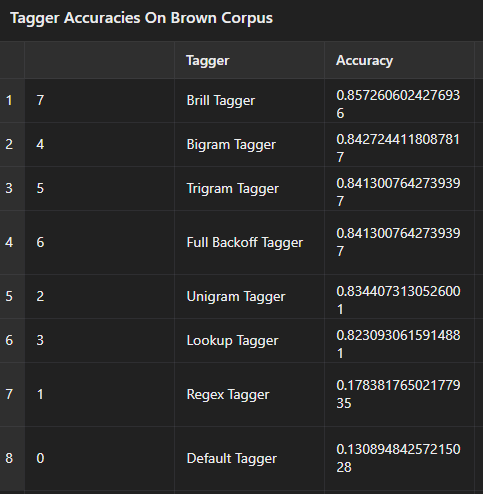



1. **Brill Tagger** achieved the highest accuracy (85.73%). It uses transformation-based learning, applying rules iteratively to improve the tagging, making it the most effective in this evaluation.

2. **Bigram Tagger** and **Trigram Tagger** performed similarly, with accuracies of 84.27% and 84.13%, respectively. These taggers consider the context of two or three consecutive words, enhancing performance over simpler models.

3. **Full Backoff Tagger**, combining multiple strategies (unigram, bigram, and trigram), matched the trigram tagger’s performance, reflecting its ability to handle various tagging challenges by falling back on simpler models when more complex ones fail.

4. **Unigram Tagger** had an accuracy of 83.44%. It tags based on the most frequent tag for each word, performing well on familiar words but lacking in context sensitivity.

5. **Lookup Tagger** (82.31%) uses a fixed list of word-tag pairs, which is effective but limited by the comprehensiveness of its lookup table.

6. **Regex Tagger** and **Default Tagger** performed the worst, with accuracies of 17.84% and 13.09%, respectively. These models are simplistic, with the default tagger assigning the same tag to every word and the regex tagger relying on pattern matching.

### Conclusion:
More complex models like the **Brill Tagger**, **Bigram Tagger**, and **Trigram Tagger** significantly outperform simpler models such as the **Default** and **Regex Taggers**, indicating the importance of contextual information in tagging. The **Full Backoff Tagger**, combining these models, offers a balanced approach but did not surpass the Brill tagger in this evaluation.